In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import pairwise_distances,silhouette_score
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



Calculating clusters: 100%|██████████| 9/9 [00:00<00:00, 73.31it/s]


Number of clusters: 2, Silhouette score: 0.6857881712617192
Number of clusters: 3, Silhouette score: 0.5528190123564095
Number of clusters: 4, Silhouette score: 0.4847804993784052
Number of clusters: 5, Silhouette score: 0.48667568026331925
Number of clusters: 6, Silhouette score: 0.36101892667522073
Number of clusters: 7, Silhouette score: 0.32354273672707196
Number of clusters: 8, Silhouette score: 0.3257913508610263
Number of clusters: 9, Silhouette score: 0.3249204604635754
Number of clusters: 10, Silhouette score: 0.3203447352803342


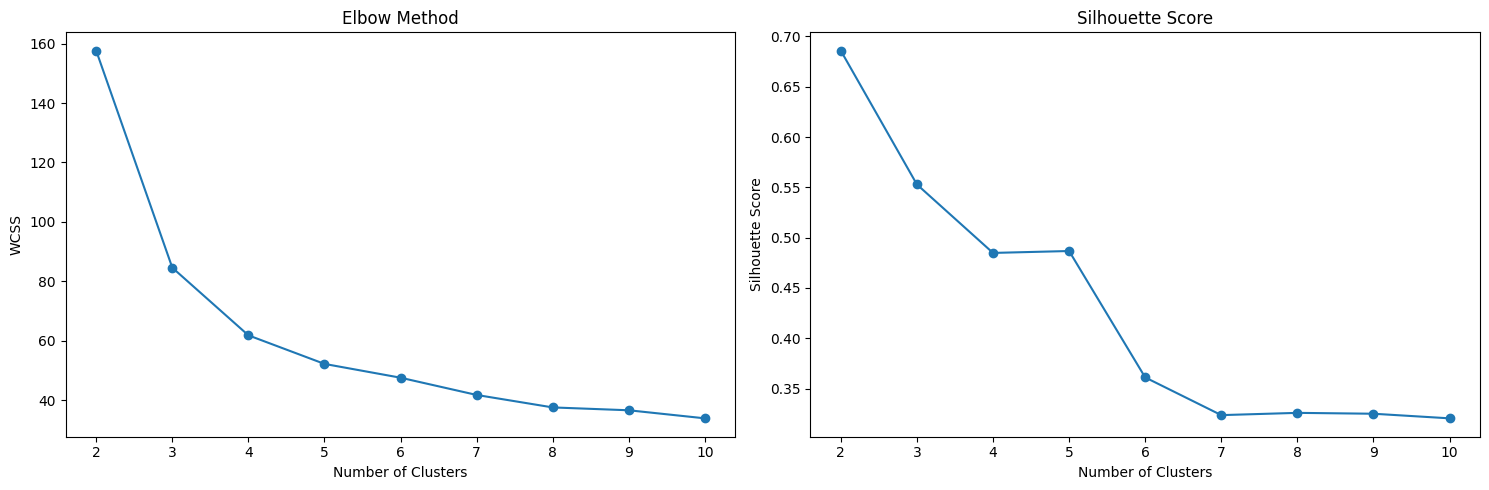


Optimal number of clusters: 2


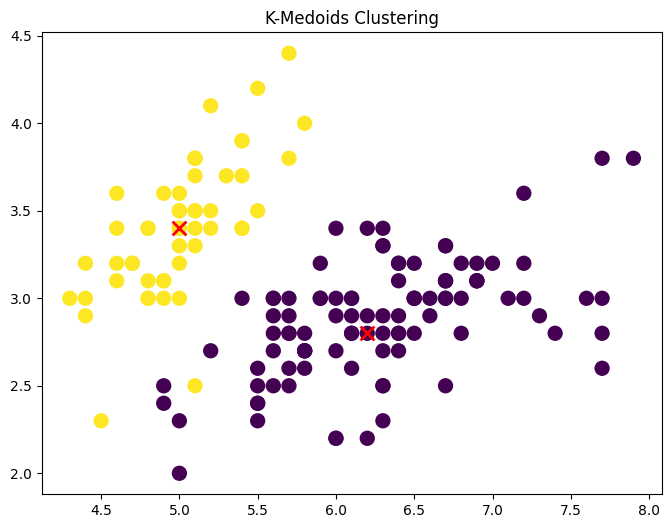

In [32]:
class KMedoids:
    def __init__(self, n_clusters=3, max_iter=100, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
    def fit(self, X):
        np.random.seed(self.random_state)

        #Step 1: Initialize random select k medoids
        n_samples = X.shape[0]
        self.medoids=np.random.choice(n_samples, self.n_clusters, replace=False)

        for _ in range(self.max_iter):
          #Step 2: Assign each point to the closest medoids
          distances = pairwise_distances(X, X[self.medoids])
          self.labels_=np.argmin(distances, axis=1)

          #Step 3: Update medoids
          new_medoids=[]
          for i in range(self.n_clusters):
            cluster_points=X[self.labels_==i]
            # Check if the cluster is empty
            if len(cluster_points) == 0:
              # Re-initialize medoids if an empty cluster is found
              self.medoids = np.random.choice(n_samples, self.n_clusters, replace=False)
              # Re-assign labels based on new medoids
              distances = pairwise_distances(X, X[self.medoids])
              self.labels_ = np.argmin(distances, axis=1)
              # Restart the iteration
              new_medoids = []
              break # Break the inner loop and continue the outer loop
            distances_in_cluster=pairwise_distances(cluster_points)
            total_distances=np.sum(distances_in_cluster, axis=1)
            new_medoid_idx=np.argmin(total_distances)   #Find point with smallest total distance
            #get the original index of the new medoids
            original_idx=np.where((X==cluster_points[new_medoid_idx]).all(axis=1))[0][0]
            new_medoids.append(original_idx) #append to list

          # If the inner loop was broken, continue to the next iteration of the outer loop
          if len(new_medoids) == 0:
              continue

          new_medoids=np.array(new_medoids)

          #check for convergence
          if np.array_equal(self.medoids, new_medoids):
            break

          self.medoids=new_medoids
        self.cluster_centers_=X[self.medoids]
        return self
    def predict(self, X):
        distances=pairwise_distances(X, self.cluster_centers_)
        return np.argmin(distances, axis=1)

#Generate sample data
X=load_iris().data
#elbow method to find the optimal number of cluster
wcss=[]
silhouette_scores=[]
range_n_clusters=range(2,11)

for n_clusters in tqdm(range_n_clusters, desc="Calculating clusters"):
  kmedoids=KMedoids(n_clusters=n_clusters, random_state=42)
  cluster_labels=kmedoids.fit(X).labels_

  #
  distances=pairwise_distances(X, kmedoids.cluster_centers_)
  wcss.append(np.sum(distances[np.arange(X.shape[0]), cluster_labels]**2))

  #
  silhouette_avg=silhouette_score(X, cluster_labels)
  silhouette_scores.append(silhouette_avg)
  print(f"Number of clusters: {n_clusters}, Silhouette score: {silhouette_avg}")


#plotting
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(range_n_clusters, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

#visualizing
optimal_k=range_n_clusters[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters: {optimal_k}")

kmedoids=KMedoids(n_clusters=optimal_k, random_state=42).fit(X)
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=kmedoids.labels_, cmap='viridis',s=100)
plt.scatter(kmedoids.cluster_centers_[:,0], kmedoids.cluster_centers_[:,1], c='red', marker='x', s=100, linewidths=2)
plt.title("K-Medoids Clustering")
plt.show()

IRIS FEATURES Clustering with KMEDOIDS

In [33]:
iris = load_iris()
X = np.array(iris.data)[:, :2]  # select sepal length and width

In [34]:
wcss=[]
silhouette_scores=[]
range_n_clusters=range(2,11)

In [35]:
for n_clusters in tqdm(range(2, 11), desc="Calculating clusters"):

  kmedoids=KMedoids(n_clusters=n_clusters, random_state=42)
  cluster_labels=kmedoids.fit(X).labels_

  #
  distances=pairwise_distances(X, kmedoids.cluster_centers_)
  wcss.append(np.sum(distances[np.arange(X.shape[0]), cluster_labels]**2))

  #
  silhouette_avg=silhouette_score(X, cluster_labels)
  silhouette_scores.append(silhouette_avg)
  print(f"Number of clusters: {n_clusters}, Silhouette score: {silhouette_avg}")

Calculating clusters:   0%|          | 0/9 [00:00<?, ?it/s]

Number of clusters: 2, Silhouette score: 0.4803232117629947
Number of clusters: 3, Silhouette score: 0.4258774249614105


Calculating clusters: 100%|██████████| 9/9 [00:00<00:00, 65.14it/s]

Number of clusters: 4, Silhouette score: 0.40901173055671514
Number of clusters: 5, Silhouette score: 0.3865174685066662
Number of clusters: 6, Silhouette score: 0.3695680529019442
Number of clusters: 7, Silhouette score: 0.3569370933223513
Number of clusters: 8, Silhouette score: 0.32419271226332275
Number of clusters: 9, Silhouette score: 0.3256580578032263
Number of clusters: 10, Silhouette score: 0.3589073033311408


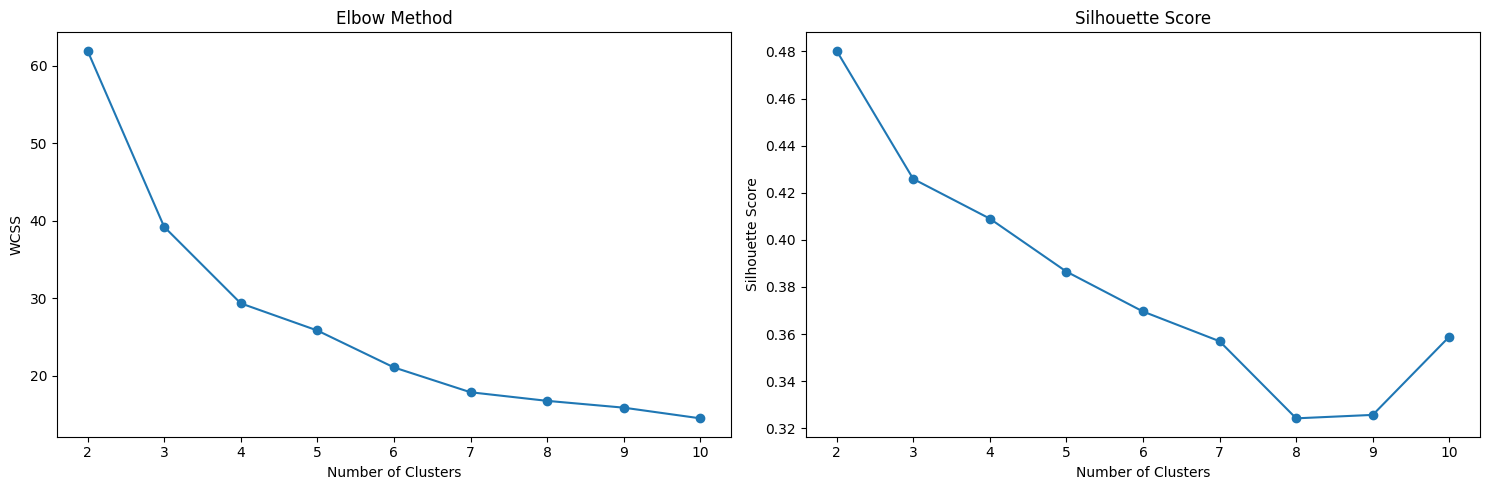

In [36]:
#plotting
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(range_n_clusters, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

In [37]:
#visualizing
optimal_k=range_n_clusters[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters: {optimal_k}")



Optimal number of clusters: 2


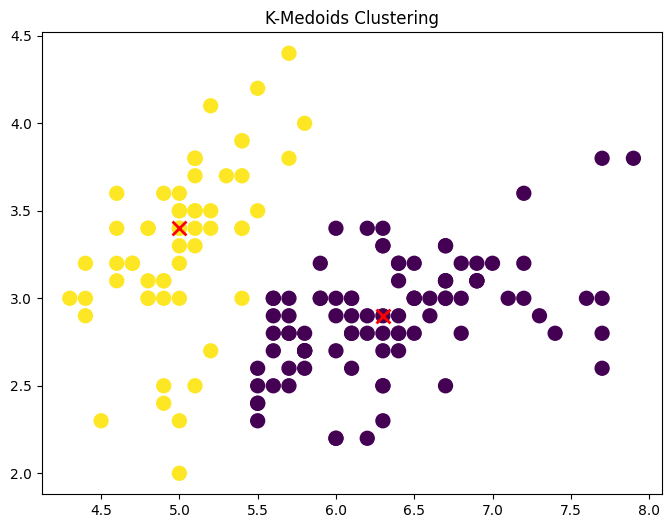

In [38]:
kmedoids=KMedoids(n_clusters=optimal_k, random_state=42).fit(X)
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=kmedoids.labels_, cmap='viridis',s=100)
plt.scatter(kmedoids.cluster_centers_[:,0], kmedoids.cluster_centers_[:,1], c='red', marker='x', s=100, linewidths=2)
plt.title("K-Medoids Clustering")
plt.show()

In [45]:
#similarly for petals
#last two rows
Y = np.array(iris.data)[:, 2:]

wcss1=[]
silhouette_scores1=[]
range_n_clusters1=range(2,11)

In [46]:
for n_clusters in tqdm(range_n_clusters1, desc="Calculating clusters"):
    kmedoids1 = KMedoids(n_clusters=n_clusters, random_state=42)
    kmedoids1.fit(Y)
    cluster_labels = kmedoids1.labels_

    distances = pairwise_distances(Y, kmedoids1.cluster_centers_)
    wcss1.append(np.sum(distances[np.arange(Y.shape[0]), cluster_labels]**2))

    silhouette_avg1 = silhouette_score(Y, cluster_labels)
    silhouette_scores1.append(silhouette_avg1)

    print(f"Number of clusters: {n_clusters}, Silhouette score: {silhouette_avg1:.4f}")

Calculating clusters: 100%|██████████| 9/9 [00:00<00:00, 67.88it/s]

Number of clusters: 2, Silhouette score: 0.7654
Number of clusters: 3, Silhouette score: 0.6614
Number of clusters: 4, Silhouette score: 0.5876
Number of clusters: 5, Silhouette score: 0.5789
Number of clusters: 6, Silhouette score: 0.4081
Number of clusters: 7, Silhouette score: 0.3501
Number of clusters: 8, Silhouette score: 0.3600
Number of clusters: 9, Silhouette score: 0.3210
Number of clusters: 10, Silhouette score: 0.3471


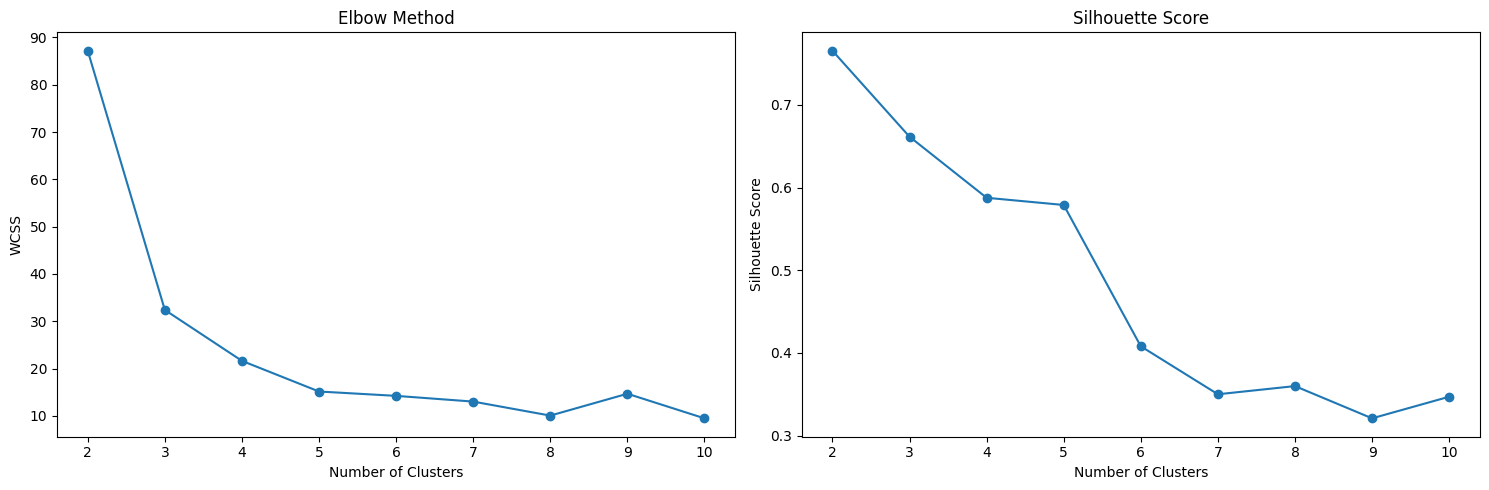

In [47]:
#plotting
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(range_n_clusters1, wcss1, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(range_n_clusters1, silhouette_scores1, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

In [48]:
#visualizing
optimal_k1 = range_n_clusters1[np.argmax(silhouette_scores1)]
print(f"\nOptimal number of clusters: {optimal_k1}")


Optimal number of clusters: 2


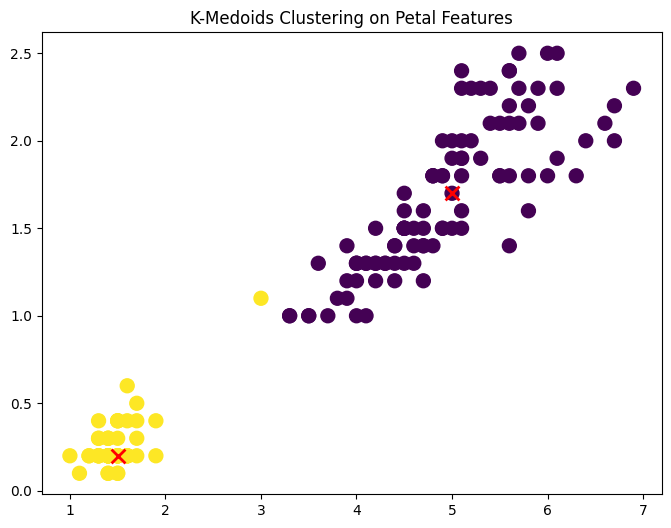

In [49]:
medoids1 = KMedoids(n_clusters=optimal_k1, random_state=42).fit(Y)

plt.figure(figsize=(8,6))
plt.scatter(Y[:,0], Y[:,1], c=medoids1.labels_, cmap='viridis', s=100)
plt.scatter(medoids1.cluster_centers_[:,0], medoids1.cluster_centers_[:,1], c='red', marker='x', s=100, linewidths=2)
plt.title("K-Medoids Clustering on Petal Features")
plt.show()